In [8]:
#libraries for data cleaning
import numpy as np
import pandas as pd

#libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#libraries for ml model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix

In [2]:
df=pd.read_csv("desktop/py_files/data/voice.csv")

In [3]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
df.shape#checking no of rows and columns of our data

(3168, 21)

In [7]:
df.info() #checking data_types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [9]:
#label encoding our label column
le=LabelEncoder()
le.fit(df.label.drop_duplicates())
df.label=le.transform(df.label)

In [11]:
#preparing our data for train test split
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train, X_test, y_train, y_test=train_test_split(x,y,train_size=0.7,random_state=38)

### SVM Model Basic

In [12]:
svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [13]:
svc.score(X_train,y_train) #model score 1

0.6725304465493911

### Tweaked SVM Model 

In [17]:
#### Applying standard scaler to increase model performance

In [14]:

# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [15]:
X_train, X_test, y_train, y_test=train_test_split(x,y,train_size=0.7,random_state=38)

In [16]:
svc.fit(X_train,y_train)
svc.score(X_train,y_train) #model score 2

0.9855660802886784

We can see our model performed brilliantly without doing much tuning on our hyperparameters.

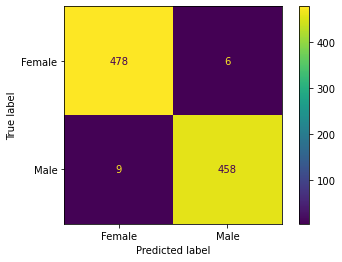

In [20]:
#plotting confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=["Female","Male"])


In the above confusion_matrix 478 female data are correctly classified out of 484
and 458 male data are correctly classified out of 467

In [24]:
#Hyperparameter Tuning
param_grid = [    
    {'C' : np.logspace(-4, 4, 20),
     "kernel" : ['linear'],
     "degree" :[2,3,4,5,6],
     "gamma" : [0.01,0.02,0.03,0.04,0.05]
    }
]
reg1 = GridSearchCV(svc, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
reg2=reg1.fit(X_train,y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 220 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 1042 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 1392 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 49.5min finished


In [25]:
reg2.score(X_train,y_train)

0.9760938204781235

We can see that after tuning our hyperparameters our model performance fell.
So,it is better to keep the keep our model unchanged.